In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

In [2]:
# code for solving the model (remember documentation and comments)

import numpy as np
from scipy import optimize
import random

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from oliver import ExchangeEconomyClass
from chris import ExchangeEconomyClass

market = ExchangeEconomyClass()

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1
## Basic Edgeworth box

We call paretoC from market. The function iterates over all possible combinations of $(x_1^A, x_2^A)$ where $ x_1^A,x_2^A \in \{0,\frac{1}{75},\frac{2}{75},...,\frac{74}{75},1\}$. Conversely, we get the values of $x_1^B$ and $x_2^B$, since $x_1^B = 1-x_1^A$ and $x_2^B = 1-x_2^B$. If the utility value of a given combination of $x_1^A, x_2^A, x_1^B, x_2^B$ yields the same or higher utility for both A and B relative to the initial endowment, that is $u^A \geq u^A_{initial}$ and $u^B \geq u^B_{initial}$, the function adds the values of $x_1^A$ and $x_2^A$ to two different lists (such that $\textit{kombinationer}$ is a list containing two lists).

In [6]:
kombinationer = market.paretoC()
print(f'{len(kombinationer)} out of {75*75} combinations satisfy C')
print(type(kombinationer))


1543 out of 5625 combinations satisfy C
<class 'list'>


We find that there are 1543 combinations out of 5625, where $u^A \geq u^A_{initial}$ and $u^B \geq u^B_{initial}$ holds. 

Now, we can plot all the combinations in an Edgeworth box, calling plot_edgeworth from market.

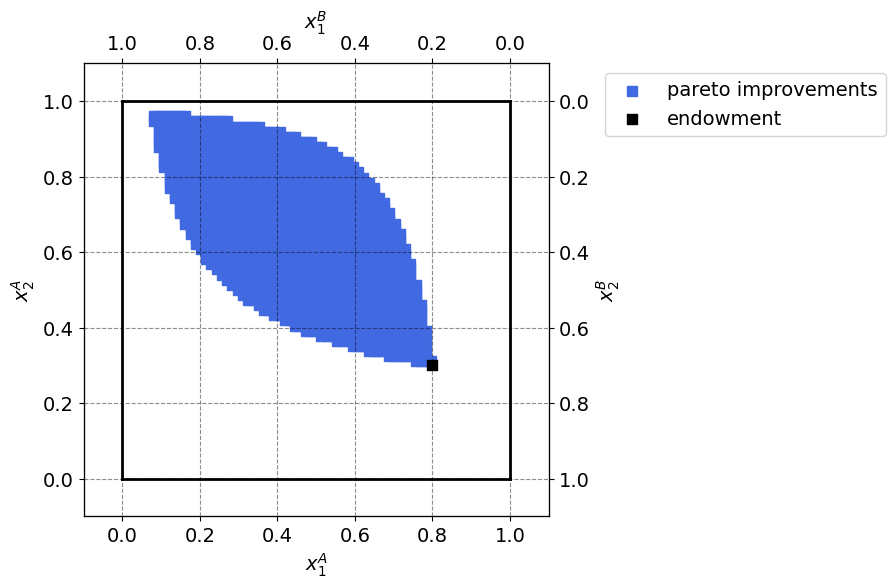

In [7]:
market.plot_edgeworth()

Skriv mere hvis tid

# Question 2
## Market error

First, we create a price vector P_1 by calling the function $P_1$ which simply just returns the list $P_1$. Next, we calculate the error in the market clearing conditions. This error stems from the fact that numerical values in Python are not defined as exactly the value they seem to be. Instead, there is a very small error. 

Next, we call the function market_clear, which uses another function check_market_clearing, which checks for the lowest error values $\epsilon_1$ and $\epsilon_2$. 

market_clear uses a for loop, which iterates over all 75 values of P_1, checking for the lowest error values $\epsilon_1 (p,\omega)$ and $\epsilon_2 (p,\omega)$, returning these values and the price which yields these low error values.



In [15]:
# 1 Create price vector P_1 from 0.5 to 2.5
P_1 = market.P_1()
# 2 Calculate market clearing price from P_1
e1_best, e2_best, p1_best = market.market_clear(P_1)

print(f'Market clearing price = {p1_best:.4f}')
print(f'Error 1 = {e1_best:.4f}')
print(f'Error 2 = {e2_best:.4f}')

Market clearing price = 0.9533
Error 1 = -0.0056
Error 2 = 0.0053


We find that the market clearing price which yields the lowest error values is 0.9533.

The widget below shows the error values given different prices.

In [17]:
%matplotlib inline
import ipywidgets as widgets

widgets.interact(
    market.plot_error,
N=widgets.fixed(75),
p1=widgets.FloatSlider(min=0.25, max=2.5, step=0.01, value = 0.9533),
)

interactive(children=(FloatSlider(value=0.9533, description='p1', max=2.5, min=0.25, step=0.01), Output()), _d…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

# Question 3
## Market clearing price

Lastly, we are asked to calculate the market clearing price. 

$
x_1^{A*} (p_1,\omega^A) + x_1^{B*}(p_1,\omega^B) = 1 \Leftrightarrow$

$\alpha \frac{p_1 w_1^A+w_2^A}{p_1} + \beta \frac{p_1 w_1^A+w_2^B}{p_1} = 1 \Leftrightarrow$

$p_1 (1-\alpha w_1^A-\beta w_1^B) = \alpha w_2^A+\beta w_2^B \Leftrightarrow$

$p_1^* = \frac{\alpha w_2^A+\beta w_2^B}{1-\alpha w_1^A-\beta w_1^B}$

In [ ]:
par = market.par
p1_star = (par.alpha*par.w2A+par.beta*par.w2B)/(1-par.alpha*par.w1A - par.beta*par.w1B)

print(f'Numerical market clearing price = {p1_best:.4f}')
print(f'Analytical market clearing price = {p1_star:.4f}\n')

market_eps_A = market.check_market_clearing(p1_best)
market_eps_B = market.check_market_clearing(p1_star)

print(f'Market error for numerical approach = {market_eps_A[0]:.5f}, {market_eps_A[1]:.5f}')
print(f'Market error for analytical approach= {market_eps_B[0]:.5f}, {market_eps_B[1]:.5f}')

Numerical market clearing price = 0.9533
Analytical market clearing price = 0.9444

Market error for numerical approach = -0.00559, 0.00533
Market error for analytical approach= 0.00000, 0.00000
